In [85]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

from sklearn import metrics

%matplotlib inline

In [63]:
## load the data 
df_players = pd.read_csv('final_data.csv')

In [64]:
df_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [65]:
df_players.shape

(10754, 22)

In [66]:
### i will drop unnecessary columns
df_players.drop(columns=['player', 'team', 'name', 'position_encoded'], inplace=True)

In [67]:
## checking for duplicated
df_players.duplicated().sum()

8

In [68]:
## drop duplicates
df_players.drop_duplicates(inplace=True)

In [69]:
## checking for missing values
df_players.isnull().sum()

position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

In [70]:
df_players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,1.074600e+04,1.074600e+04,10746.000000
mean,181.238001,26.045564,36.434115,0.125648,0.087042,0.189898,0.004669,0.006831,0.131753,0.044914,2472.628792,118.049507,15.838079,1.962218,3.625638e+06,6.157156e+06,0.307742
std,6.970505,4.777299,26.517799,0.235648,0.143385,0.432518,0.025241,0.081173,0.442486,0.924781,2021.330905,175.242459,23.388320,3.744947,9.098270e+06,1.339382e+07,0.461581
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053836,0.000000,0.000000,0.000000,0.000000,662.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,0.000000
50%,181.240353,26.000000,35.000000,0.046178,0.040942,0.150360,0.000000,0.000000,0.000000,0.000000,2104.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,186.000000,29.000000,59.000000,0.172400,0.133226,0.248451,0.000000,0.000000,0.000000,0.000000,3968.750000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


In [71]:
df_players.dtypes

position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

# Feature Engineering

In [89]:
# How to select the better features for better prediction?
# 1. We might see what features affect on our target (manually) but not efficient
# 2. We can remove highly correlated features 
# 3. We can use some statistical methods for dimentionality reduction like PCA
# 4. We can remove the features that have low varience
# 5. A new method i learnt which is Recursive Feature Elimination (RFE) that removes the least importance features related to the model's performance
# number 5 is mostly used with supervised learning problems

## I will try varience threshold

In [73]:
# one hot encoding
df_players = pd.get_dummies(df_players, columns=['position'])


In [75]:
# scaking the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_players)

In [ ]:
# Use NearestNeighbors to find the optimal eps
#min_samples = 2

In [ ]:
# Selecting Features

In [77]:
# Applying varience threshold to remove the features that has low v
selector = VarianceThreshold(threshold=0.15)
X_reduced = selector.fit_transform(X_scaled)


# Building the Model

In [96]:
# now let's apply DBSCAN on the reduced features 
chosen_eps = 0.4
dbscan = DBSCAN(eps=chosen_eps, min_samples=5)
clusters = dbscan.fit_predict(X_reduced)

In [82]:
df_players['Cluster'] = clusters

# Evaluating the Model

In [87]:
silhouette_avg = silhouette_score(df_players, clusters)

In [88]:
silhouette_avg
# i think the varience brought a good results

-0.6283550708601452

In [90]:
df_players.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,Cluster
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,True,False,False,False,False,False,False,-1
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,True,False,False,False,False,False,False,-1
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,True,False,False,False,False,False,False,-1
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,-1
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,-1


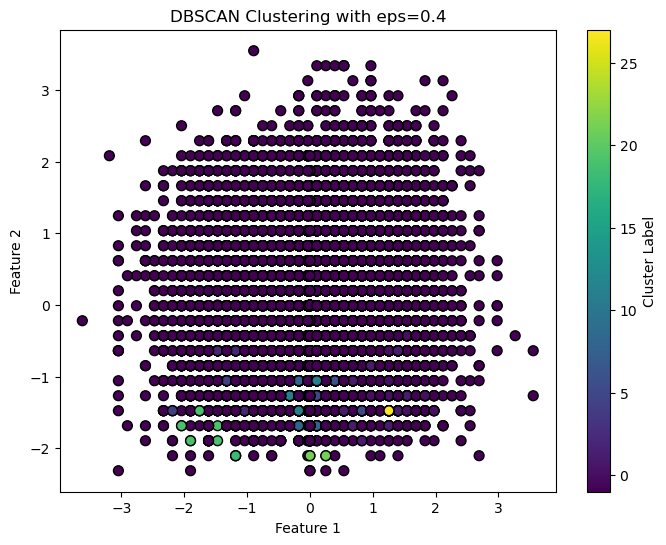

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

<Axes: xlabel='highest_value', ylabel='goals'>

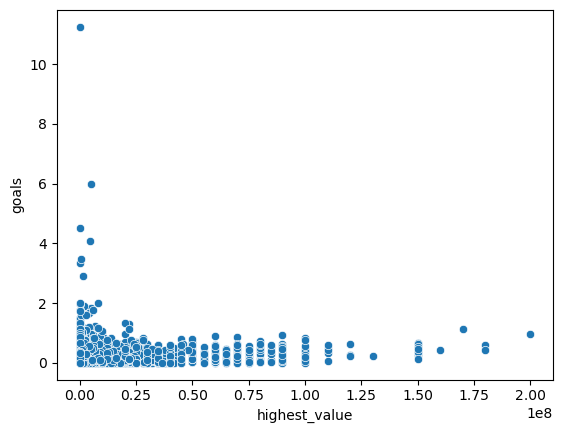

In [104]:
sns.scatterplot(data = df_players , 
                x = 'highest_value', 
                y = 'goals' 
              # hue='dbscan'
               )


In [ ]:
## Try the PCA method